In [2]:
print("Hellow World")

Hellow World


In [3]:
# Libraries required for this tutorial...

# import dask
from datetime import datetime
import numpy as np
import xarray as xr
import xwrf

import matplotlib.pyplot as plt

# Plotting wrfstat variables...

# path_shcu_root = "/gpfs/wolf2/arm/atm124/world-shared/arm-summer-school-2024/lasso_tutorial/ShCu/untar/"  # on cumulus
path_shcu_root = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/ShCu/untar"  # on Jupyter

case_date = datetime(2019, 4, 4)
sim_id = 4

ds_stat = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")
ds_stat


<xarray.Dataset> Size: 72GB
Dimensions:         (Time: 91, bottom_top: 226, bottom_top_stag: 227,
                     south_north: 250, west_east: 250, west_east_stag: 251,
                     south_north_stag: 251)
Coordinates:
    XTIME           (Time) datetime64[ns] 728B ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, south_north,
                                west_east, west_east_stag, south_north_stag
Data variables: (12/179)
    Times           (Time) |S19 2kB ...
    CST_CLDLOW      (Time) float32 364B ...
    CST_CLDTOT      (Time) float32 364B ...
    CST_LWP         (Time) float32 364B ...
    CST_IWP         (Time) float32 364B ...
    CST_PRECW       (Time) float32 364B ...
    ...              ...
    CSV_IWC         (Time, bottom_top, south_north, west_east) float32 5GB ...
    CSV_CLDFRAC     (Time, bottom_top, south_north, west_east) float32 5GB ...
    CSS_LWP         (Time, south_north, west_east) float32 23MB ...
    CSS_IWP         (Time, south_north, west_east) float32 23MB ...
    CSS_CLDTOT      (Time, south_north, west_east) float32 23MB ...
    CSS_CLDLOW      (Time, south_north, west_east) float32 23MB ...
Attributes: (12/96)
    TITLE:                                  OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                            2019-04-04_12:00:00
    WEST-EAST_GRID_DIMENSION:              251
    SOUTH-NORTH_GRID_DIMENSION:            251
    BOTTOM-TOP_GRID_DIMENSION:             227
    DX:                                    100.0
    ...                                    ...
    config_aerosol:                        NA
    config_forecast_time:                  15.0 h
    config_boundary_method:                Periodic
    config_microphysics:                   Thompson (mp_physics=8)
    config_nickname:                       runlas20190404v1addhm
    simulation_origin_host:                cumulus-login2.ccs.ornl.gov

In [52]:
case_date = datetime(2019, 4, 4)
sim_id = 4

# Note the extra details required by open_mfdataset to connect the files together in time.
ds_xwrf_1 = xr.open_mfdataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/raw_model/wrfout_d01_*.nc", combine="nested", concat_dim="Time").xwrf.postprocess()
ds_xwrf_1["Time"] = ds_xwrf_1["XTIME"]

sim_id=5

ds_xwrf_2 = xr.open_mfdataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/raw_model/wrfout_d01_*.nc", combine="nested", concat_dim="Time").xwrf.postprocess()
ds_xwrf_2["Time"] = ds_xwrf_2["XTIME"]

sim_id=6

ds_xwrf_3 = xr.open_mfdataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/raw_model/wrfout_d01_*.nc", combine="nested", concat_dim="Time").xwrf.postprocess()
ds_xwrf_3["Time"] = ds_xwrf_3["XTIME"]


In [53]:
ds_xwrf_1['qc_path']=ds_xwrf_1['QCLOUD'].sum(dim=['z'])
ds_xwrf_2['qc_path']=ds_xwrf_2['QCLOUD'].sum(dim=['z'])
ds_xwrf_3['qc_path']=ds_xwrf_3['QCLOUD'].sum(dim=['z'])

In [47]:
ds_xwrf

<xarray.Dataset> Size: 255GB
Dimensions:                    (Time: 91, y: 250, x: 250, soil_layers_stag: 5,
                                z: 226, x_stag: 251, y_stag: 251, z_stag: 227,
                                force_layers: 751)
Coordinates: (12/15)
    CLAT                       (y, x) float32 250kB dask.array<chunksize=(125, 125), meta=np.ndarray>
    XLAT                       (y, x) float32 250kB dask.array<chunksize=(125, 125), meta=np.ndarray>
    XLONG                      (y, x) float32 250kB dask.array<chunksize=(125, 125), meta=np.ndarray>
    XTIME                      (Time) datetime64[ns] 728B dask.array<chunksize=(6,), meta=np.ndarray>
    XLAT_U                     (y, x_stag) float32 251kB dask.array<chunksize=(125, 126), meta=np.ndarray>
    XLONG_U                    (y, x_stag) float32 251kB dask.array<chunksize=(125, 126), meta=np.ndarray>
    ...                         ...
  * z_stag                     (z_stag) float32 908B 1.0 0.9959 ... 0.002178 0.0
  * Time                       (Time) datetime64[ns] 728B 2019-04-04T12:00:00...
  * y_stag                     (y_stag) float64 2kB -1.25e+04 ... 1.25e+04
  * x_stag                     (x_stag) float64 2kB -1.25e+04 ... 1.25e+04
  * y                          (y) float64 2kB -1.245e+04 ... 1.245e+04
  * x                          (x) float64 2kB -1.245e+04 ... 1.245e+04
Dimensions without coordinates: soil_layers_stag, force_layers
Data variables: (12/254)
    Times                      (Time) |S19 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    LU_INDEX                   (Time, y, x) float32 23MB dask.array<chunksize=(1, 125, 125), meta=np.ndarray>
    ZS                         (Time, soil_layers_stag) float32 2kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    DZS                        (Time, soil_layers_stag) float32 2kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    VAR_SSO                    (Time, y, x) float32 23MB dask.array<chunksize=(1, 125, 125), meta=np.ndarray>
    U                          (Time, z, y, x_stag) float32 5GB dask.array<chunksize=(1, 226, 125, 126), meta=np.ndarray>
    ...                         ...
    wind_north                 (Time, z, y, x) float32 5GB dask.array<chunksize=(1, 226, 125, 125), meta=np.ndarray>
    wind_east_10               (Time, y, x) float32 23MB dask.array<chunksize=(1, 125, 125), meta=np.ndarray>
    wind_north_10              (Time, y, x) float32 23MB dask.array<chunksize=(1, 125, 125), meta=np.ndarray>
    qc_path                    (Time, y, x) float32 23MB dask.array<chunksize=(1, 125, 125), meta=np.ndarray>
    i_org                      (Time) float64 728B 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Max_Clouds                 (Time) float64 728B 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/142)
    TITLE:                                  OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                            2019-04-04_12:00:00
    SIMULATION_START_DATE:                 2019-04-04_12:00:00
    WEST-EAST_GRID_DIMENSION:              251
    SOUTH-NORTH_GRID_DIMENSION:            251
    BOTTOM-TOP_GRID_DIMENSION:             227
    ...                                    ...
    config_aerosol:                        NA
    config_forecast_time:                  15.0 h
    config_boundary_method:                Periodic
    config_microphysics:                   Thompson (mp_physics=8)
    config_nickname:                       runlas20190404v1addhm
    simulation_origin_host:                cumulus-login2.ccs.ornl.gov

In [73]:
#### Field Plots #####
import os
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import math
from scipy.stats import norm
import xarray as xr
import netCDF4 as nc
import sys

sys.setrecursionlimit(1000000)

##########################################################################################
class cell:
    def __init__(self, id):
        self.id = id
        self.value = [[],[]]
        self.location = [[],[]]
        self.nelements = 0
        self.nelements_local = 0

    def add_elements(self, i, j, var_values):
        self.location[0].append(i)
        self.location[1].append(j)
        self.value[0].append(var_values)
        self.nelements = self.nelements + 1
        self.nelements_local = self.nelements_local + 1
    def __del__(self):
        return
##########################################################################################
def find_boolean(variable, threshold_criteria): #variable is f(i, j, t): --> outputs boolean -1 (unsatisfied) 0 (satisfied) 
    boolean = np.zeros(( len(variable[:,0]), len(variable[0,:])))
    boolean = -1
    boolean = np.where(variable[:,:]>threshold_criteria,0,-1)
    return boolean;
########################################################################################
def identify_elements_in_cell(i,j,new_cell):  #input the ijk at which boolean is satisfied along with boolean and new cell created 

    global booli;
    new_cell.add_elements(i,j,cell_variable[i,j])
    booli[i,j] = -1

    ii=i-1; jj=j; #look west
    if ii<0:
       ii = nx-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i+1; jj=j;  #look east
    if ii>nx-1:
       ii = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j+1;  #look north
    if jj>ny-1:
        jj = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j-1;  #look south
    if jj<0:
       jj = ny-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell) 
#################################################################################################
def create_new_cell(variable,bool):                                # input the boolean and the variable, output is the cells tracked (i,j,t) based on boolean 
    cell_number = 0;
    global booli,cell_variable,nx,ny;
    nx = len(variable[:,0])
    ny = len(variable[0,:])
    booli=bool;cell_variable = variable;
    variable_cells = []
    for j in range(0,ny):
        for i in range(0,nx):
            if booli[i,j]==0: 
                new_cell=cell(cell_number) 
                identify_elements_in_cell(i,j,new_cell)
                if new_cell.nelements>=nminelems:
                    variable_cells.append(new_cell)
                    variable_cells[cell_number].id = cell_number
                    cell_number = cell_number + 1
                else:
                    del new_cell;
    return variable_cells, cell_number;
#################################################################################################
def run_tracking(tracked_variable,param_threshold):
    global nx,ny;
    nx = len(tracked_variable[:,0]); ny = len(tracked_variable[0,:]); 
    bool = find_boolean(tracked_variable,param_threshold)
    [cells,cell_number] = create_new_cell(tracked_variable,bool);
    return cells,cell_number;
####################################################################################################
def find_cell_centers(cells,ncells):
    centers=np.zeros((ncells,2))
    max_cloudsize=0;
    for i in range(0,ncells):
        centers[i,0]=np.mean(cells[i].location[0])
        centers[i,1]=np.mean(cells[i].location[1])
        if cells[i].nelements>max_cloudsize:
            max_cloudsize=cells[i].nelements
    return centers,max_cloudsize;
####################################################################################################
def find_nearest_neighbor(centers,nx,ny):
    distance=np.zeros(len(centers[:,0]))
    nn_distance=np.zeros(len(centers[:,0]))
    for i in range(len(centers[:,0])):
        for j in range(len(centers[:,0])):
            if i==j:
                distance[j]=100;
            else:
                xdist=min(abs(centers[i,0]+nx-centers[j,0]),abs(centers[i,0]-nx-centers[j,0]),abs(centers[i,0]-centers[j,0]))
                ydist=min(abs(centers[i,1]+ny-centers[j,1]),abs(centers[i,1]-ny-centers[j,1]),abs(centers[i,1]-centers[j,1]))
                distance[j]=math.sqrt(xdist**2+ydist**2)
        nn_distance[i]=min(distance)
    return nn_distance;
####################################################################################################
def retrieve_variable(variable_name,netcdf_path): #open corresponding netcdf file and read data
    all_data=xr.open_dataset(netcdf_path,decode_times=False)
    var=all_data[variable_name].values
    variable=var
    x=all_data['x'].values
    y=all_data['y'].values
    t=all_data['Time'].values
    return variable, x, y, t;    
##########################################################################################
#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/w_cross.nc')
def get_iorg(xr_data,variable_name,param_threshold,start_ind,slice_len):
    variable=xr_data[variable_name].values
    i_org=np.zeros(xr_data.Time.size)
    Max_Clouds=np.zeros(xr_data.Time.size)
    for i in range(start_ind,xr_data.Time.size,slice_len):
        if i%60==0:
            print(i)
        [clouds,ncells]=run_tracking(tracked_variable=variable[i,:,:],param_threshold=param_threshold)
        if ncells<2:
            i_org[i]=0;
            Max_Clouds[i]=0;
        else:
            [centers,Max_Clouds[i]]=find_cell_centers(clouds,ncells)
            nn_distance=find_nearest_neighbor(centers,nx,ny)
            centers=centers.astype(int)
            nn_sorted = np.sort(nn_distance);nn_sorted=nn_sorted/max(nn_sorted)
            p = 1. * np.arange(len(nn_distance)) / (len(nn_distance) - 1)
            p_ran=1-np.exp(-1*(math.pi)*nn_sorted*nn_sorted)
            i_org[i]=np.trapz(p,x=p_ran)
    xr_data['i_org']=xr.DataArray(i_org,dims=['Time'])
    xr_data['Max_Clouds']=xr.DataArray(Max_Clouds,dims=['Time'])
    return xr_data;
#########################################################################################


nminelems=10
slice_len=1;

ds_xwrf_1=get_iorg(ds_xwrf_1,'qc_path',0.005,start_ind=0,slice_len=slice_len)
ds_xwrf_2=get_iorg(ds_xwrf_2,'qc_path',0.005,start_ind=0,slice_len=slice_len)
ds_xwrf_3=get_iorg(ds_xwrf_3,'qc_path',0.005,start_ind=0,slice_len=slice_len)

0
60
0
60
0
60


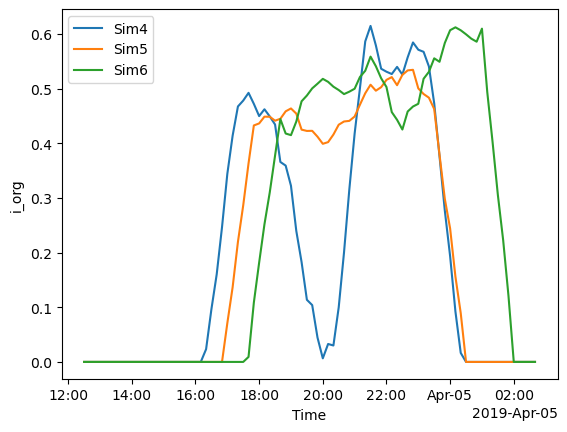

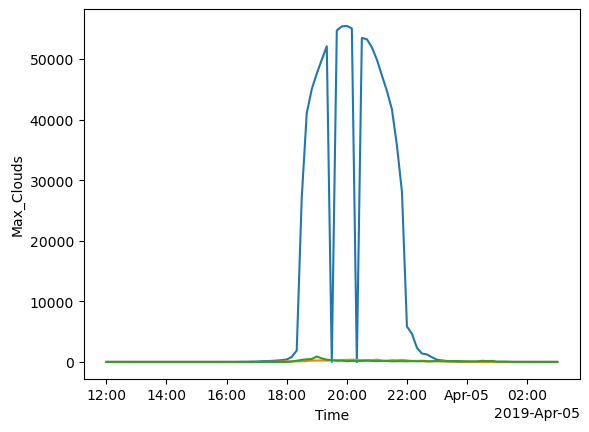

In [75]:
pl.figure()
ds_xwrf_1.i_org.rolling(Time=6, center=True).mean().dropna("Time").plot.line(label='Sim4')
ds_xwrf_2.i_org.rolling(Time=6, center=True).mean().dropna("Time").plot.line(label='Sim5')
ds_xwrf_3.i_org.rolling(Time=6, center=True).mean().dropna("Time").plot.line(label='Sim6')
pl.legend()



pl.figure()
ds_xwrf_1.Max_Clouds.plot()
ds_xwrf_2.Max_Clouds.plot()
ds_xwrf_3.Max_Clouds.plot()

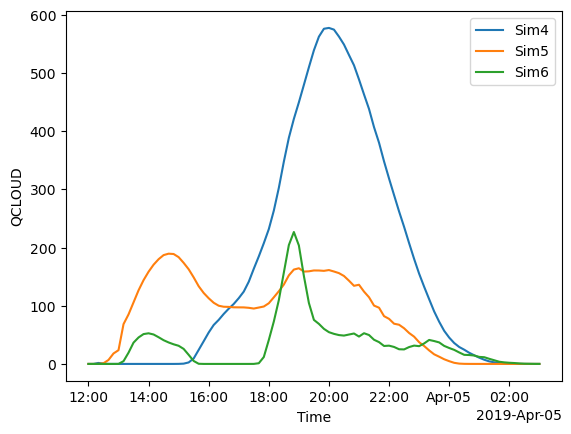

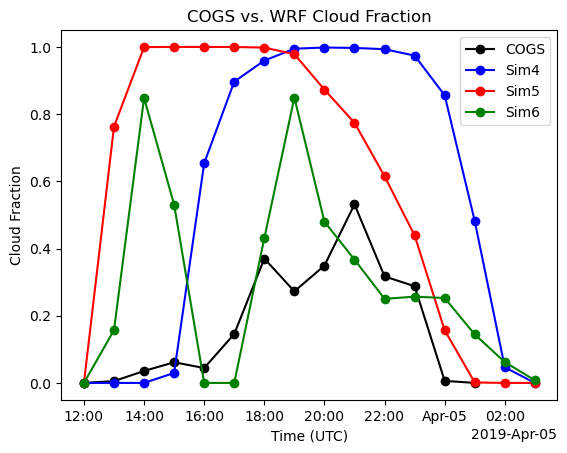

In [72]:
pl.figure()
ds_xwrf_1.QCLOUD.sum(dim=['x','y','z']).plot.line(label='Sim4')
ds_xwrf_2.QCLOUD.sum(dim=['x','y','z']).plot.line(label='Sim5')
ds_xwrf_3.QCLOUD.sum(dim=['x','y','z']).plot.line(label='Sim6')
pl.legend()

sim_id=4
ds_cogs_1 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/obs_model/sgplassocogsdiagobsmod{sim_id}C1.m1.{case_date:%Y%m%d}.120000.nc")
sim_id=5
ds_cogs_2 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/obs_model/sgplassocogsdiagobsmod{sim_id}C1.m1.{case_date:%Y%m%d}.120000.nc")
sim_id=6
ds_cogs_3 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/obs_model/sgplassocogsdiagobsmod{sim_id}C1.m1.{case_date:%Y%m%d}.120000.nc")

fig, ax = plt.subplots(ncols=1)
ds_cogs_1["low_cloud_fraction_cogs"].isel(source_type=0).plot(ax=ax, marker="o", label="COGS",color='k')
ds_cogs_1["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="o", label="Sim4", color='b')
ds_cogs_2["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="o", label="Sim5", color= 'r')
ds_cogs_3["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="o", label="Sim6", color = 'g')
# If you plan to share with frieds, do a little clean-up beyond the default labelling from xarray...
ax.legend()
ax.set_title("COGS vs. WRF Cloud Fraction")
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Cloud Fraction")
plt.show()
